# Categorise The Countries using Socio-Economic and Health Factors

In [77]:
#import data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Data Extraction

In [78]:
country = pd.read_csv('Country-data.csv')
df = pd.DataFrame(country)

In [79]:
df.shape

(167, 10)

In [80]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [81]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Transform Data

In [83]:
df['child_mort'] = df['child_mort'].astype(int)
df['exports'] = df['exports'].astype(int)
df['health'] = df['health'].astype(int)
df['imports'] = df['imports'].astype(int)
df['inflation'] = df['inflation'].astype(int)
df['life_expec'] = df['life_expec'].astype(int)
df['total_fer'] = df['total_fer'].astype(int)
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan          90       10       7       44    1610   
1              Albania          16       28       6       48    9930   
2              Algeria          27       38       4       31   12900   
3               Angola         119       62       2       42    5900   
4  Antigua and Barbuda          10       45       6       58   19100   

   inflation  life_expec  total_fer   gdpp  
0          9          56          5    553  
1          4          76          1   4090  
2         16          76          2   4460  
3         22          60          6   3530  
4          1          76          2  12200

## K-Means Clustering Model

### Socio-Economic

In [84]:
df.head(20)

country  child_mort  exports  health  imports  income  \
0           Afghanistan          90       10       7       44    1610   
1               Albania          16       28       6       48    9930   
2               Algeria          27       38       4       31   12900   
3                Angola         119       62       2       42    5900   
4   Antigua and Barbuda          10       45       6       58   19100   
5             Argentina          14       18       8       16   18700   
6               Armenia          18       20       4       45    6700   
7             Australia           4       19       8       20   41400   
8               Austria           4       51      11       47   43200   
9            Azerbaijan          39       54       5       20   16000   
10              Bahamas          13       35       7       43   22900   
11              Bahrain           8       69       4       50   41100   
12           Bangladesh          49       16       3       21    2440   
13             Barbados          14       39       7       48   15300   
14              Belarus           5       51       5       64   16200   
15              Belgium           4       76      10       74   41100   
16               Belize          18       58       5       57    7880   
17                Benin         111       23       4       37    1820   
18               Bhutan          42       42       5       70    6420   
19              Bolivia          46       41       4       34    5410   

    inflation  life_expec  total_fer   gdpp  
0           9          56          5    553  
1           4          76          1   4090  
2          16          76          2   4460  
3          22          60          6   3530  
4           1          76          2  12200  
5          20          75          2  10300  
6           7          73          1   3220  
7           1          82          1  51900  
8           0          80          1  46900  
9          13          69          1   5840  
10          0          73          1  28000  
11          7          76          2  20700  
12          7          70          2    758  
13          0          76          1  16000  
14         15          70          1   6030  
15          1          80          1  44400  
16          1          71          2   4340  
17          0          61          5    758  
18          5          72          2   2180  
19          8          71          3   1980

In [85]:
candidates = {'exports': [10,28,38,62,45,18,20,19,51,54,35,69,16,39,51,76,58,23,42,41],
              'imports': [44,48,31,42,58,16,45,20,47,20,43,50,21,48,64,74,57,37,70,34],
              'income': [1610, 9930, 12900, 5900, 19100, 18700, 6700, 41400, 43200, 16000, 22900, 41100, 2440, 15300, 16200,
                        41100, 7880, 1820, 6420, 5410],
              'inflation': [9,4,16,22,1,20,7,1,0,13,0,7,7,0,15,1,1,0,5,8],
              'gdpp': [553, 4090, 4460, 3530, 12200, 10300, 3220, 51900, 46900, 5840, 28000, 20700, 758, 16000, 6030, 44400, 
                      4340, 758, 2180, 1980]}
df1 = pd.DataFrame(candidates, columns= ['exports', 'imports', 'income', 'inflation', 'gdpp'])
df1.head(20)

exports  imports  income  inflation   gdpp
0        10       44    1610          9    553
1        28       48    9930          4   4090
2        38       31   12900         16   4460
3        62       42    5900         22   3530
4        45       58   19100          1  12200
5        18       16   18700         20  10300
6        20       45    6700          7   3220
7        19       20   41400          1  51900
8        51       47   43200          0  46900
9        54       20   16000         13   5840
10       35       43   22900          0  28000
11       69       50   41100          7  20700
12       16       21    2440          7    758
13       39       48   15300          0  16000
14       51       64   16200         15   6030
15       76       74   41100          1  44400
16       58       57    7880          1   4340
17       23       37    1820          0    758
18       42       70    6420          5   2180
19       41       34    5410          8   1980

In [86]:
#split data
X = df1[['exports', 'imports', 'inflation', 'gdpp']]
y = df1['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12, 4)
(12,)
(8, 4)
(8,)


In [87]:
#generate model
kmc = KMeans()
kmc.fit(X_train, y_train)
y_predict = kmc.predict(X_test)

print(X_test)
print(y_predict)

    exports  imports  inflation   gdpp
3        62       42         22   3530
16       58       57          1   4340
6        20       45          7   3220
10       35       43          0  28000
2        38       31         16   4460
14       51       64         15   6030
4        45       58          1  12200
17       23       37          0    758
[3 3 3 5 3 3 6 0]


In [88]:
#prediction
pred = kmc.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(pred)
print(accuracy)

[3 3 3 5 3 3 6 0]
0.0


In [89]:
#confusion matrix
print(confusion_matrix(y_test, pred))

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]]


In [90]:
kmeans = KMeans(n_clusters=12).fit(df1)
result = kmeans.cluster_centers_
print(result)

[[4.30000000e+01 5.25000000e+01 8.90500000e+03 2.50000000e+00
  4.21500000e+03]
 [7.60000000e+01 7.40000000e+01 4.11000000e+04 1.00000000e+00
  4.44000000e+04]
 [6.90000000e+01 5.00000000e+01 4.11000000e+04 7.00000000e+00
  2.07000000e+04]
 [3.15000000e+01 3.70000000e+01 1.89000000e+04 1.05000000e+01
  1.12500000e+04]
 [3.50000000e+01 4.30000000e+01 2.29000000e+04 0.00000000e+00
  2.80000000e+04]
 [1.63333333e+01 3.40000000e+01 1.95666667e+03 5.33333333e+00
  6.89666667e+02]
 [5.25000000e+01 4.20000000e+01 1.61000000e+04 1.40000000e+01
  5.93500000e+03]
 [3.90000000e+01 4.80000000e+01 1.53000000e+04 0.00000000e+00
  1.60000000e+04]
 [1.90000000e+01 2.00000000e+01 4.14000000e+04 1.00000000e+00
  5.19000000e+04]
 [4.12500000e+01 4.77500000e+01 6.10750000e+03 1.05000000e+01
  2.72750000e+03]
 [3.80000000e+01 3.10000000e+01 1.29000000e+04 1.60000000e+01
  4.46000000e+03]
 [5.10000000e+01 4.70000000e+01 4.32000000e+04 0.00000000e+00
  4.69000000e+04]]


In [91]:
#print('scatterplot of export & income')
plt.figure(figsize=(10,6))
plt.scatter(df1['exports'], df1['income'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(result[:, 0], result[:, 1], c='red', s=50)
plt.title("Export ~ Income")
plt.xlabel("Export")
plt.ylabel("Income")
plt.show()

In [92]:
#print('scatterplot of import & inflation')
plt.figure(figsize=(10,6))
plt.scatter(df1['imports'], df1['inflation'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(result[:, 0], result[:, 1], c='red', s=50)
plt.title("Import ~ Inflation")
plt.xlabel("Import")
plt.ylabel("Inflation")
plt.show()

In [93]:
#print('scatterplot of income & GDP')
plt.figure(figsize=(10,6))
plt.scatter(df1['income'], df1['gdpp'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(result[:, 0], result[:, 1], c='red', s=50)
plt.title("Income ~ GDP")
plt.xlabel("Income")
plt.ylabel("GDP")
plt.show()

### Health Factor

In [94]:
candidates = {'child_mort': [90,16,27,119,10,14,18,4,4,39,13,8,49,14,5,4,18,111,42,46],
              'health': [7,6,4,2,6,8,4,8,11,5,7,4,3,7,5,10,5,4,5,4],
              'life_expec': [56,76,76,60,76,75,73,82,80,69,73,76,70,76,70,80,71,61,72,71],
              'total_fer': [5,1,2,6,2,2,1,1,1,1,1,2,2,1,1,1,2,5,2,3]}
df2 = pd.DataFrame(candidates, columns= ['child_mort', 'health', 'life_expec', 'total_fer'])
df2.head(20)

child_mort  health  life_expec  total_fer
0           90       7          56          5
1           16       6          76          1
2           27       4          76          2
3          119       2          60          6
4           10       6          76          2
5           14       8          75          2
6           18       4          73          1
7            4       8          82          1
8            4      11          80          1
9           39       5          69          1
10          13       7          73          1
11           8       4          76          2
12          49       3          70          2
13          14       7          76          1
14           5       5          70          1
15           4      10          80          1
16          18       5          71          2
17         111       4          61          5
18          42       5          72          2
19          46       4          71          3

In [95]:
#split data
A = df2[['child_mort', 'life_expec', 'total_fer']]
b = df2['health']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.4, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12, 4)
(12,)
(8, 4)
(8,)


In [96]:
#generate model
kmc = KMeans()
kmc.fit(A_train, b_train)
y_predict = kmc.predict(A_test)

print(A_test)
print(y_predict)

    child_mort  life_expec  total_fer
3          119          60          6
16          18          71          2
6           18          73          1
10          13          73          1
2           27          76          2
14           5          70          1
4           10          76          2
17         111          61          5
[2 3 3 3 3 1 1 2]


In [97]:
#prediction
pred = kmc.predict(A_test)
accuracy = accuracy_score(b_test, pred)
print(pred)
print(accuracy)

[2 3 3 3 3 1 1 2]
0.125


In [98]:
#confusion matrix
print(confusion_matrix(b_test, pred))

[[0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 2 0 0 0 0]
 [1 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]]


In [99]:
kmeans = KMeans(n_clusters=7).fit(df2)
result = kmeans.cluster_centers_
print(result)

[[ 44.           4.25        70.5          2.        ]
 [ 90.           7.          56.           5.        ]
 [ 15.5          6.16666667  74.           1.33333333]
 [115.           3.          60.5          5.5       ]
 [  4.           9.66666667  80.66666667   1.        ]
 [ 27.           4.          76.           2.        ]
 [  7.66666667   5.          74.           1.66666667]]


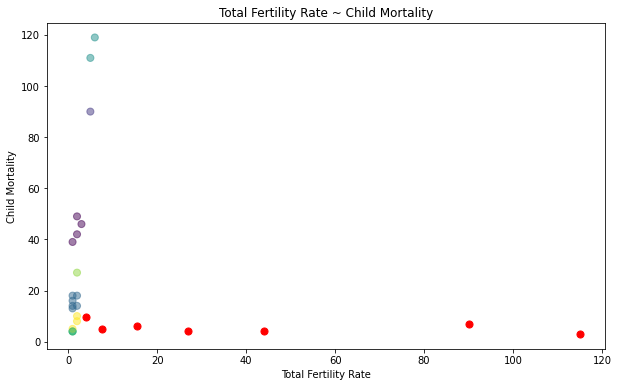

In [100]:
#print('scatterplot of total fertility rate & child mortality')
plt.figure(figsize=(10,6))
plt.scatter(df2['total_fer'], df2['child_mort'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(result[:, 0], result[:, 1], c='red', s=50)
plt.title("Total Fertility Rate ~ Child Mortality")
plt.xlabel("Total Fertility Rate")
plt.ylabel("Child Mortality")
plt.show()

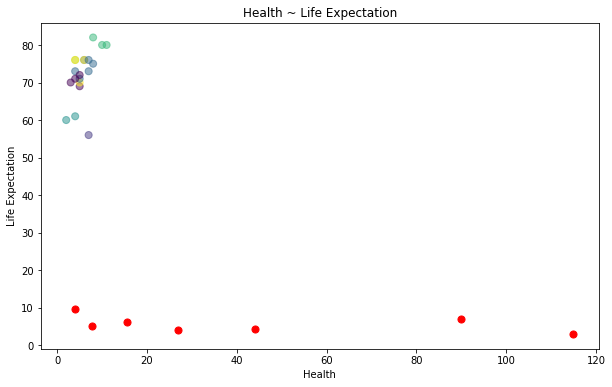

In [101]:
#print('scatterplot of  & income')
plt.figure(figsize=(10,6))
plt.scatter(df2['health'], df2['life_expec'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(result[:, 0], result[:, 1], c='red', s=50)
plt.title("Health ~ Life Expectation")
plt.xlabel("Health")
plt.ylabel("Life Expectation")
plt.show()

## Visualization

<AxesSubplot:>

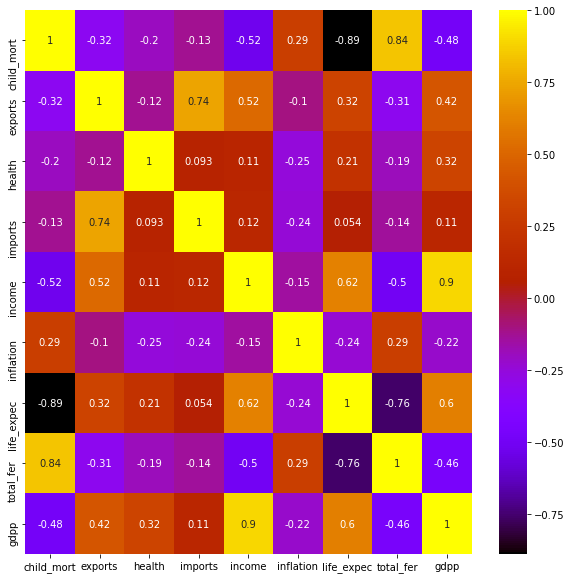

In [102]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(country.corr(), annot=True, cmap='gnuplot')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


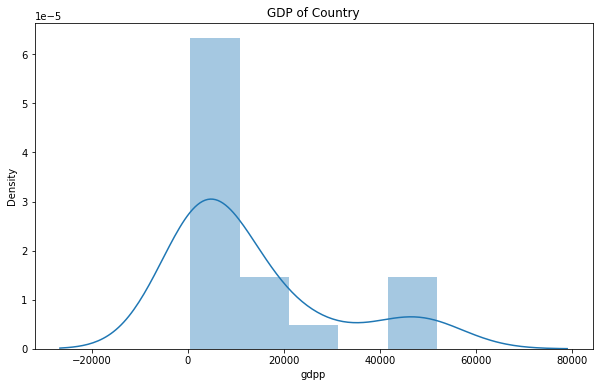

In [103]:
#distribution of socio-economic
plt.figure(figsize=(10,6))
sns.distplot(df1.gdpp)
plt.title("GDP of Country")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


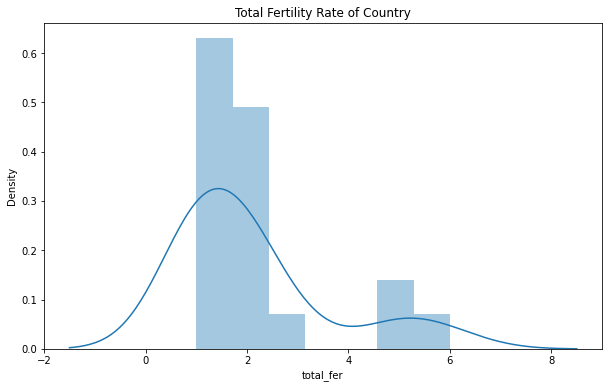

In [104]:
#distribution of health factor
plt.figure(figsize=(10,6))
sns.distplot(df2.total_fer)
plt.title("Total Fertility Rate of Country")
plt.show()